# KNN Assignment
### - Using KNN to classify the 10 classes in CIFAR-10 Dataset

```
Done By : Mohammed Aadil
Roll No : IIT2018179
```

### I have tried the following approaches:

1. Naive KNN on pixel values
2. PCA + KNN
3. CNN (feature extraction) + KNN
4. Optimised_CNN + KNN


------

### Importing Headers

In [1]:
# Basic ML Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA


# CIFAR-10 Dataset
from keras.datasets import cifar10

# Keras and TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, ZeroPadding2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import load_model

------
## Data Preprocessing
```
    - loading dataset from Keras
    - converting to float32 (for CNN)
    - normalizing the values
```

In [2]:
# Load The Dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

# Convert uint8 to float32
trainX = trainX.astype(np.float32)
testX = testX.astype(np.float32)

# Normalize the images
trainX = trainX / 255.0
testX = testX / 255.0

# Dataset Summary
print('Train: ')
print('\tX : ', trainX.shape)
print('\ty : ', trainy.shape)
print('Test: ')
print('\tX : ', testX.shape)
print('\ty : ', testy.shape)

170500096/170498071 [==============================] - 6s 0us/step
Train: 
	X :  (50000, 32, 32, 3)
	y :  (50000, 1)
Test: 
	X :  (10000, 32, 32, 3)
	y :  (10000, 1)


### Visualizing some of the images in the dataset

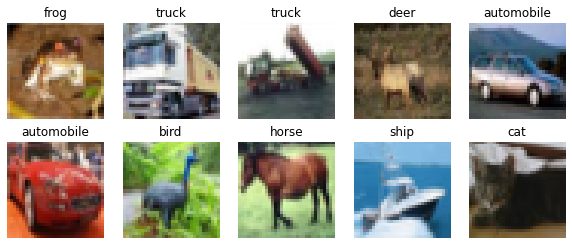

In [3]:
labels = {0: 'airplane', 1: 'automobile', 2: 'bird',
          3: 'cat', 4: 'deer', 5: 'dog',6: 'frog', 
          7: 'horse', 8: 'ship', 9: 'truck'}

plt.figure(figsize=(10,4))
plt.tight_layout()
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(trainX[i])
    plt.title(labels[trainy[i][0]])
    plt.axis('off')
plt.show()

### Checking for Biases in the Train and Test set

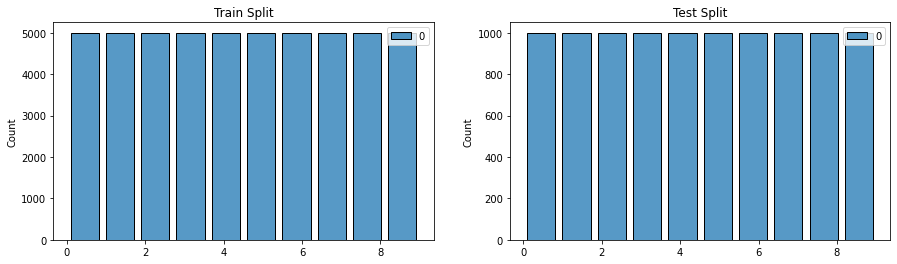

In [4]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(trainy, bins=10, shrink=.8)
plt.title('Train Split')
plt.subplot(1,2,2)
sns.histplot(testy, bins=10, shrink=.8)
plt.title('Test Split')
plt.show()

------
## Naive KNN

### Training

In [5]:
# reshaping data to fit the KNN
flat_trainX = trainX.reshape(50000, 3072)
flat_testX = testX.reshape(10000, 3072)

In [6]:
# Training KNN-C
KNN_trainy = trainy.reshape(50000)
classifier = KNeighborsClassifier(n_neighbors=9) # k=9 gave the best results

classifier.fit(flat_trainX, KNN_trainy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

### Testing & Results

In [7]:
pred = classifier.predict(flat_testX)

pred = pred.reshape(10000, 1)

acc = np.sum(1*(pred==testy))/testy.shape[0]
print("Naive KNN  = ", acc*100)

Naive KNN  =  33.98


### Confusion Matrix

[]

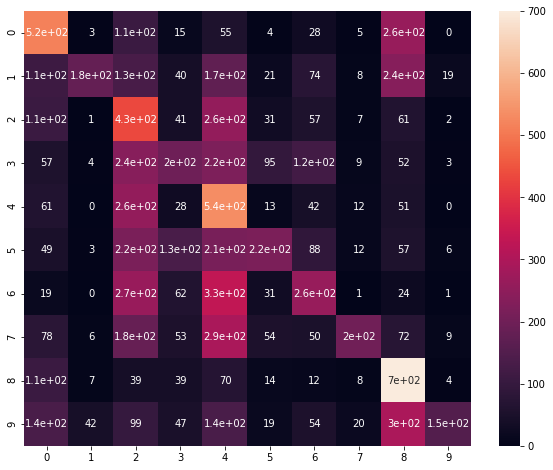

In [8]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(testy, pred)
sns.heatmap(cm, annot=True)
plt.plot()

### Model Summary

In [9]:
matrix = classification_report(testy, pred)
print('Naive KNN Report : \n', matrix)

Naive KNN Report : 
               precision    recall  f1-score   support

           0       0.42      0.52      0.46      1000
           1       0.73      0.18      0.29      1000
           2       0.22      0.43      0.29      1000
           3       0.30      0.20      0.24      1000
           4       0.23      0.54      0.33      1000
           5       0.44      0.22      0.29      1000
           6       0.33      0.26      0.29      1000
           7       0.71      0.20      0.31      1000
           8       0.39      0.70      0.50      1000
           9       0.77      0.15      0.25      1000

    accuracy                           0.34     10000
   macro avg       0.45      0.34      0.33     10000
weighted avg       0.45      0.34      0.33     10000



------
## PCA + KNN Model

### PCA

In [10]:
pca = PCA(n_components=256)
pca.fit(flat_trainX)

PCA_trainX = pca.transform(flat_trainX)

print("Shape after PCA ", PCA_trainX.shape)

Shape after PCA  (50000, 256)


### Training

In [11]:
# Training KNN-C
KNN_trainy = trainy.reshape(50000)
classifier = KNeighborsClassifier(n_neighbors=9) # k=9 gave the best results

classifier.fit(PCA_trainX, KNN_trainy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

### Testing & Results

In [12]:
PCA_testX = pca.transform(flat_testX)

pred = classifier.predict(PCA_testX)

pred = pred.reshape(10000, 1)

acc = np.sum(1*(pred==testy))/testy.shape[0]
print("PCA + KNN  = ", acc*100)

PCA + KNN  =  35.9


### Confusion Matrix

[]

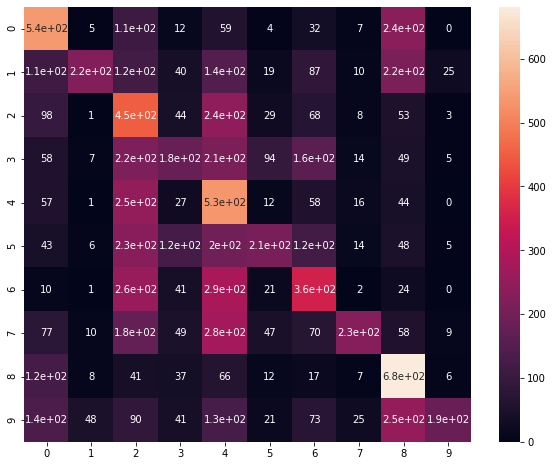

In [13]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(testy, pred)
sns.heatmap(cm, annot=True)
plt.plot()

### Model Summary

In [14]:
matrix = classification_report(testy, pred)
print('PCA + KNN Report : \n', matrix)

PCA + KNN Report : 
               precision    recall  f1-score   support

           0       0.43      0.54      0.48      1000
           1       0.72      0.23      0.34      1000
           2       0.23      0.45      0.31      1000
           3       0.30      0.18      0.23      1000
           4       0.25      0.53      0.34      1000
           5       0.45      0.21      0.29      1000
           6       0.34      0.35      0.35      1000
           7       0.69      0.23      0.34      1000
           8       0.41      0.68      0.51      1000
           9       0.78      0.19      0.30      1000

    accuracy                           0.36     10000
   macro avg       0.46      0.36      0.35     10000
weighted avg       0.46      0.36      0.35     10000



------

## Finding the Best value for K

So I tried running the model for different values of k, and got the following results:

![k_vs_acc](https://user-images.githubusercontent.com/66634743/116617914-6fe94080-a94f-11eb-959e-7d2a93b047ad.png)

As we can see for `K=9` the model's accuracy is the highest

#### (NOTE : This test was done on the Optimised CNN + KNN Model)

------

## Basic CNN + KNN Model

#### NOTE : I have already trained and saved the CNN model, so you dont have to run the tedious process of model training.

I will be using the model as a feature extractor, that's the reasen i am removing the top(prediction) layer.

### End of the training process, for the Basic CNN model:

<img src="https://user-images.githubusercontent.com/66634743/116617917-7081d700-a94f-11eb-8077-5c1aed8e9740.png" width=900 height=350>

### Loss function and the Accuracy

![basic_plot](https://user-images.githubusercontent.com/66634743/116617904-6e1f7d00-a94f-11eb-90c4-777208e3dee8.png)

In [14]:
# loading the model
model = load_model('models/basic_CNN.h5')
# freezing the layers as I dont want to train the model on the test set. 
model.trainable = False

# removing the last prediction layer
FE_model = Sequential()
for layer in model.layers[:-1]:
    FE_model.add(layer)

FE_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1


### Training the KNN Classifier

In [15]:
# Extracting Training Features
features = FE_model.predict(trainX, verbose=1)
print('\nShape of Feature Vector\n', features.shape)

# Training KNN-C
KNN_trainy = trainy.reshape(50000)
classifier = KNeighborsClassifier(n_neighbors=9) # k=9 gave the best results
classifier.fit(features, KNN_trainy)

1563/1563 [==============================] - 35s 2ms/step

Shape of Feature Vector
 (50000, 128)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')


### Testing the CNN + KNN Model

In [16]:
# Extracting the Test Featuers
test_features = FE_model.predict(testX, verbose=1)

# Prediction based on the features extracted
pred = classifier.predict(test_features)

313/313 [==============================] - 1s 2ms/step



### Results

In [17]:
pred = pred.reshape(10000, 1)

acc = np.sum(1*(pred==testy))/testy.shape[0]
print("Basic CNN + KNN  = ", acc*100)

Basic CNN + KNN  =  85.6


### Confusion matrix and Summary

[]

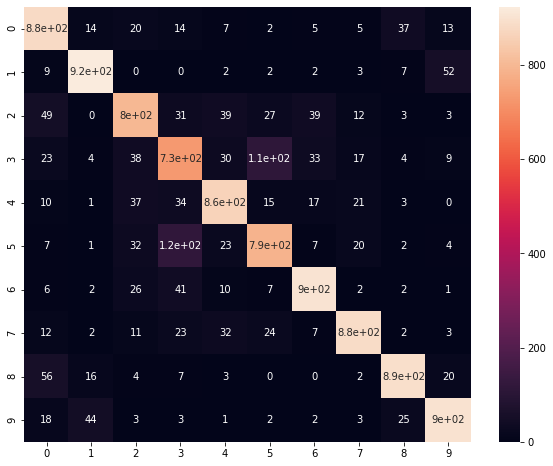

In [18]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(testy, pred)
sns.heatmap(cm, annot=True)
plt.plot()

In [19]:
matrix = classification_report(testy, pred)
print('Basic CNN + KNN Report : \n', matrix)

Basic CNN + KNN Report : 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.92      0.92      0.92      1000
           2       0.82      0.80      0.81      1000
           3       0.73      0.73      0.73      1000
           4       0.85      0.86      0.86      1000
           5       0.80      0.79      0.80      1000
           6       0.89      0.90      0.90      1000
           7       0.91      0.88      0.90      1000
           8       0.91      0.89      0.90      1000
           9       0.90      0.90      0.90      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



------

## Optimised CNN + KNN Model

#### NOTE : Same as the above CNN model but,

These were the optimizations I did :

- added a max accuracy checkpoint
- early stopping based on the validation loss
- dynamically reduce the learning rate, if validation loss plateaus

the code for that like so:

```python

    checkpoint = ModelCheckpoint("optimised_CNN.h5", monitor='val_loss', mode='min', save_best_only=True, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)

    callbacks = [early_stopping, reduce_lr, checkpoint]
    steps = int(trainX.shape[0] / 64)

    history = model.fit(trainX, trainy, steps_per_epoch=steps, epochs=100, validation_data=(testX, testy), callbacks=callbacks)
    
```
### End of the training process, for the Optimised CNN model:

![better_model](https://user-images.githubusercontent.com/66634743/116617911-6f50aa00-a94f-11eb-9715-d016da07532b.png)

### Loss function and the Accuracy

![better_model_plots](https://user-images.githubusercontent.com/66634743/116617912-6f50aa00-a94f-11eb-984e-1de73e39d2e5.png)

In [20]:
# loading the model
model = load_model('models/optimised_CNN.h5')
# freezing the layers as I dont want to train the model on the test set. 
model.trainable = False

# removing the last prediction layer
FE_model = Sequential()
for layer in model.layers[:-1]:
    FE_model.add(layer)


### Training the KNN Classifier

In [21]:
# Extracting Training Features
features = FE_model.predict(trainX, verbose=1)
print('\nShape of Feature Vector\n', features.shape)

# Training KNN-C
KNN_trainy = trainy.reshape(50000)
classifier = KNeighborsClassifier(n_neighbors=9) # k=9 gave the best results
classifier.fit(features, KNN_trainy)

1563/1563 [==============================] - 3s 2ms/step

Shape of Feature Vector
 (50000, 128)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')


### Testing the CNN + KNN Model

In [22]:
# Extracting the Test Featuers
test_features = FE_model.predict(testX, verbose=1)

# Prediction based on the features extracted
pred = classifier.predict(test_features)

313/313 [==============================] - 1s 2ms/step



### Results

In [23]:
pred = pred.reshape(10000, 1)

acc = np.sum(1*(pred==testy))/testy.shape[0]
print("Optimised CNN + KNN  = ", acc*100)

Optimised CNN + KNN  =  88.92


### Confusion matrix and Summary

[]

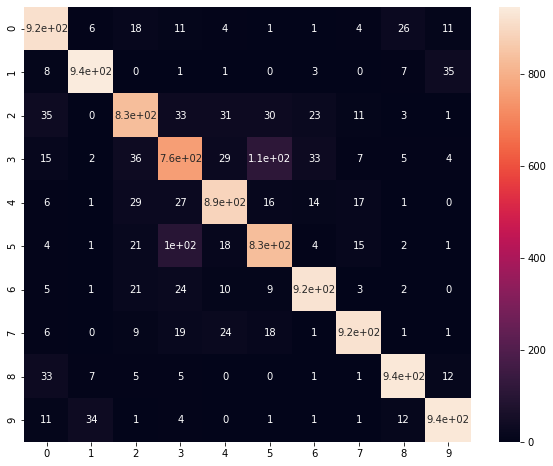

In [24]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(testy, pred)
sns.heatmap(cm, annot=True)
plt.plot()

In [25]:
matrix = classification_report(testy, pred)
print('Optimised CNN + KNN Report : \n', matrix)

Optimised CNN + KNN Report : 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1000
           1       0.95      0.94      0.95      1000
           2       0.86      0.83      0.84      1000
           3       0.77      0.76      0.76      1000
           4       0.88      0.89      0.89      1000
           5       0.82      0.83      0.82      1000
           6       0.92      0.93      0.92      1000
           7       0.94      0.92      0.93      1000
           8       0.94      0.94      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



------
## Final Result Summary

Split -> **Train:Test :: 50000:10000**

This is after taking avg of **5 runs**

| Model | Acc | Precision | Recall | F1 |
| -: | :-: | :-: | :-: | :-: |
| Naive KNN | 36.98 | 0.45 | 0.34 | 0.35 |
| PCA + KNN | 38.89 | 0.46 | 0.38 | 0.39 |
| Basic CNN + KNN | 85.60 | 0.86 | 0.86 | 0.86 |
| Optimised CNN + KNN | 88.98 | 0.89 | 0.89 | 0.89 |

